# **GENERAL CLASSIFICATION OF THYROID CANCER RISK**

Thyroid cancer is a disease where the exact cause is often unknown. However, certain factors can increase the likelihood of developing it. These are called risk factors. It’s important to understand that having one or more risk factors doesn’t guarantee you’ll get thyroid cancer. Similarly, even if you don’t have any known risk factors, it doesn’t mean you’re completely safe from the disease.

A risk factor is anything that raises your chances of getting a disease like cancer. Different types of cancer have different risk factors. Some risk factors, such as smoking or diet, can be changed or controlled. Others, like your age, gender, or family history, are beyond your control.

In this project, I will thoroughly explore a dataset that includes the following details:

- **Patient_ID (int)**: A unique number assigned to each patient.
- **Age (int)**: The patient’s age.
- **Gender (object)**: The patient’s gender, recorded as Male or Female.
- **Country (object)**: The country where the patient lives.
- **Ethnicity (object)**: The patient’s ethnic background.
- **Family_History (object)**: Indicates if the patient has a family history of thyroid cancer (Yes/No).
- **Radiation_Exposure (object)**: Shows whether the patient has been exposed to radiation in the past (Yes/No).
- **Iodine_Deficiency (object)**: Indicates if the patient has an iodine deficiency (Yes/No).
- **Smoking (object)**: Records whether the patient smokes (Yes/No).
- **Obesity (object)**: Indicates if the patient is obese (Yes/No).
- **Diabetes (object)**: Shows whether the patient has diabetes (Yes/No).
- **TSH_Level (float)**: The patient’s Thyroid-Stimulating Hormone level, measured in µIU/mL.
- **T3_Level (float)**: The patient’s Triiodothyronine level, measured in ng/dL.
- **T4_Level (float)**: The patient’s Thyroxine level, measured in µg/dL.
- **Nodule_Size (float)**: The size of thyroid nodules, measured in centimeters (cm).
- **Thyroid_Cancer_Risk (object)**: The estimated risk of thyroid cancer, categorized as Low, Medium, or High.
- **Diagnosis (object)**: The final diagnosis, indicating whether the condition is Benign (non-cancerous) or Malignant (cancerous).

This dataset provides a comprehensive view of factors that may influence thyroid cancer risk, and I will analyze it in detail to uncover meaningful insights using machine learning.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score, f1_score, classification_report

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/thyroid-cancer-risk-dataset/thyroid_cancer_risk_data.csv


***Exploratory Data Analysis***

In [2]:
thyroid_data = pd.read_csv('/kaggle/input/thyroid-cancer-risk-dataset/thyroid_cancer_risk_data.csv')
thyroid_data.head()

,Patient_ID,Age,Gender,Country,Ethnicity,Family_History,Radiation_Exposure,Iodine_Deficiency,Smoking,Obesity,Diabetes,TSH_Level,T3_Level,T4_Level,Nodule_Size,Thyroid_Cancer_Risk,Diagnosis
0,1,66,Male,Russia,Caucasian,No,Yes,No,No,No,No,9.37,1.67,6.16,1.08,Low,Benign
1,2,29,Male,Germany,Hispanic,No,Yes,No,No,No,No,1.83,1.73,10.54,4.05,Low,Benign
2,3,86,Male,Nigeria,Caucasian,No,No,No,No,No,No,6.26,2.59,10.57,4.61,Low,Benign
3,4,75,Female,India,Asian,No,No,No,No,No,No,4.10,2.62,11.04,2.46,Medium,Benign
4,5,35,Female,Germany,African,Yes,Yes,No,No,No,No,9.10,2.11,10.71,2.11,High,Benign


In [3]:
thyroid_data .shape

(212691, 17)

In [4]:
thyroid_data .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212691 entries, 0 to 212690
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Patient_ID           212691 non-null  int64  
 1   Age                  212691 non-null  int64  
 2   Gender               212691 non-null  object 
 3   Country              212691 non-null  object 
 4   Ethnicity            212691 non-null  object 
 5   Family_History       212691 non-null  object 
 6   Radiation_Exposure   212691 non-null  object 
 7   Iodine_Deficiency    212691 non-null  object 
 8   Smoking              212691 non-null  object 
 9   Obesity              212691 non-null  object 
 10  Diabetes             212691 non-null  object 
 11  TSH_Level            212691 non-null  float64
 12  T3_Level             212691 non-null  float64
 13  T4_Level             212691 non-null  float64
 14  Nodule_Size          212691 non-null  float64
 15  Thyroid_Cancer_Ri

In [5]:
thyroid_data = thyroid_data .drop_duplicates("Patient_ID", keep='first')
thyroid_data = thyroid_data .reset_index(drop=True)

In [6]:
thyroid_data .isnull().sum()

Patient_ID             0
Age                    0
Gender                 0
Country                0
Ethnicity              0
Family_History         0
Radiation_Exposure     0
Iodine_Deficiency      0
Smoking                0
Obesity                0
Diabetes               0
TSH_Level              0
T3_Level               0
T4_Level               0
Nodule_Size            0
Thyroid_Cancer_Risk    0
Diagnosis              0
dtype: int64

From the information provided, it’s clear that this dataset does not contain any missing values. This means every entry for each patient is complete, with no gaps or empty fields.

In [7]:
thyroid_data = thyroid_data.drop(columns=['Diagnosis'])

The code provided removes the *Diagnosis* column from the dataset. In this analysis, we will focus solely on determining whether a patient has a high risk of thyroid cancer or not. The reason for this is that diagnosing thyroid cancer involves complex processes, such as medical imaging and biopsies. Since we don’t have access to such specific medical data, it makes more sense to limit our analysis to predicting the risk level (Low, Medium, or High) rather than attempting to diagnose the condition itself. This approach ensures our analysis stays within the boundaries of the data we have and remains practical and accurate.

In [8]:
for_encoding = LabelEncoder()

need_to_change = [
    'Gender', 'Country', 'Ethnicity', 'Family_History', 
    'Radiation_Exposure', 'Iodine_Deficiency', 'Smoking', 
    'Obesity', 'Diabetes', 'Thyroid_Cancer_Risk'
]

for col in need_to_change:
    thyroid_data[col] = for_encoding.fit_transform(thyroid_data[col])
    print(f"Mapping for {col}:")
    print(list(for_encoding.classes_))
    print("Encoded Values Mapping:")
    for i, class_name in enumerate(for_encoding.classes_):
        print(f"{i} -> {class_name}")
    print()

Mapping for Gender:
['Female', 'Male']
Encoded Values Mapping:
0 -> Female
1 -> Male

Mapping for Country:
['Brazil', 'China', 'Germany', 'India', 'Japan', 'Nigeria', 'Russia', 'South Korea', 'UK', 'USA']
Encoded Values Mapping:
0 -> Brazil
1 -> China
2 -> Germany
3 -> India
4 -> Japan
5 -> Nigeria
6 -> Russia
7 -> South Korea
8 -> UK
9 -> USA

Mapping for Ethnicity:
['African', 'Asian', 'Caucasian', 'Hispanic', 'Middle Eastern']
Encoded Values Mapping:
0 -> African
1 -> Asian
2 -> Caucasian
3 -> Hispanic
4 -> Middle Eastern

Mapping for Family_History:
['No', 'Yes']
Encoded Values Mapping:
0 -> No
1 -> Yes

Mapping for Radiation_Exposure:
['No', 'Yes']
Encoded Values Mapping:
0 -> No
1 -> Yes

Mapping for Iodine_Deficiency:
['No', 'Yes']
Encoded Values Mapping:
0 -> No
1 -> Yes

Mapping for Smoking:
['No', 'Yes']
Encoded Values Mapping:
0 -> No
1 -> Yes

Mapping for Obesity:
['No', 'Yes']
Encoded Values Mapping:
0 -> No
1 -> Yes

Mapping for Diabetes:
['No', 'Yes']
Encoded Values Mapp

To make this data usable for machine learning models, we need to convert these categories into numbers. This is where LabelEncoder comes in.

In [9]:
thyroid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212691 entries, 0 to 212690
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Patient_ID           212691 non-null  int64  
 1   Age                  212691 non-null  int64  
 2   Gender               212691 non-null  int64  
 3   Country              212691 non-null  int64  
 4   Ethnicity            212691 non-null  int64  
 5   Family_History       212691 non-null  int64  
 6   Radiation_Exposure   212691 non-null  int64  
 7   Iodine_Deficiency    212691 non-null  int64  
 8   Smoking              212691 non-null  int64  
 9   Obesity              212691 non-null  int64  
 10  Diabetes             212691 non-null  int64  
 11  TSH_Level            212691 non-null  float64
 12  T3_Level             212691 non-null  float64
 13  T4_Level             212691 non-null  float64
 14  Nodule_Size          212691 non-null  float64
 15  Thyroid_Cancer_Ri

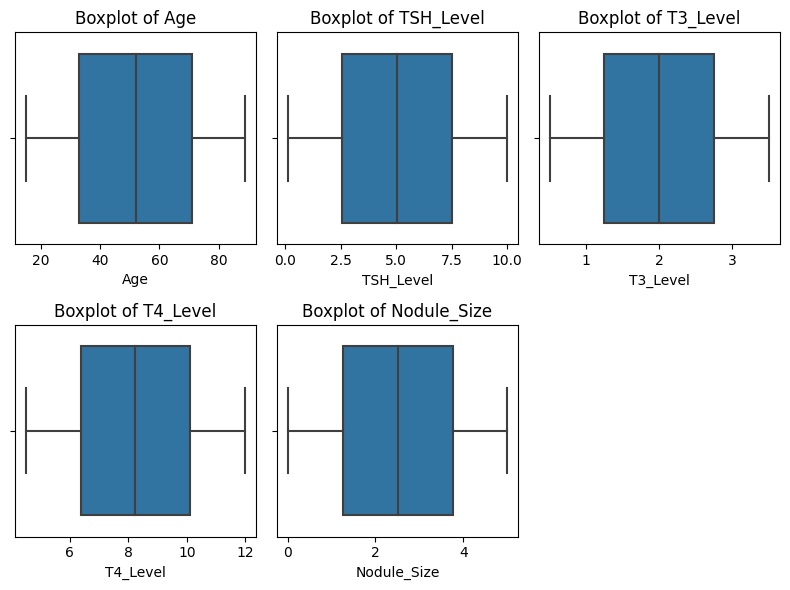

In [10]:
checking_outlier = ['Age', 'TSH_Level', 'T3_Level', 'T4_Level', 'Nodule_Size']

plt.figure(figsize=(8, 6))

for i, column in enumerate(checking_outlier):
    plt.subplot(2, 3, i+1) 
    sns.boxplot(x=thyroid_data[column])
    plt.title(f'Boxplot of {column}')

plt.tight_layout()

plt.show()

A boxplot is a great tool for checking outliers in datasets

Thyroid_Cancer_Risk
1    50.960313
2    34.039992
0    14.999694
Name: count, dtype: float64


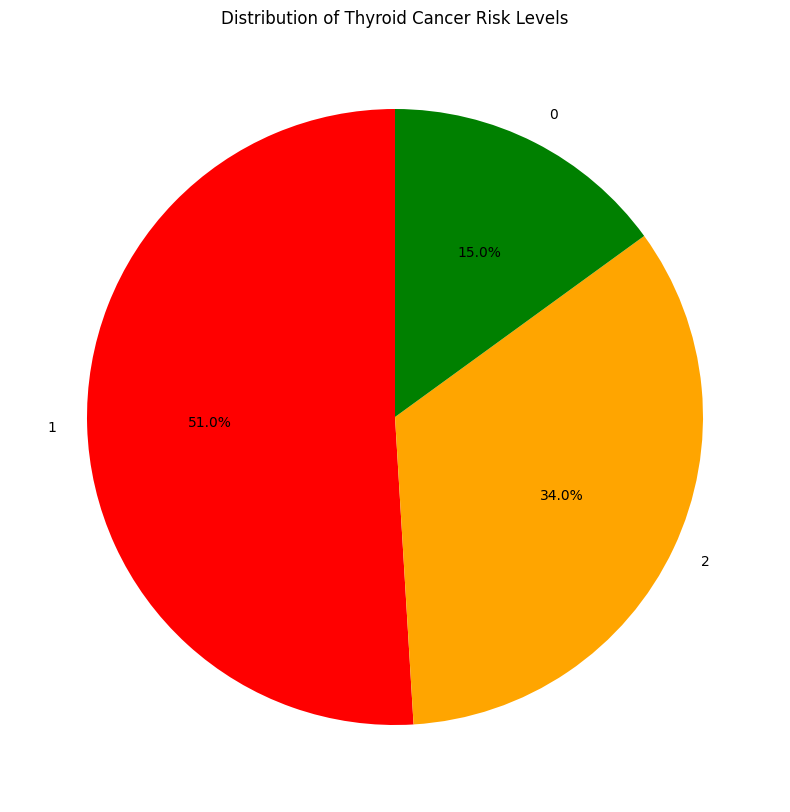

In [11]:
category_counts = thyroid_data['Thyroid_Cancer_Risk'].value_counts()
category_percentages = category_counts / len(thyroid_data) * 100
print(category_percentages)

plt.figure(figsize=(10, 10))
plt.pie(category_percentages, labels=category_percentages.index, autopct='%1.1f%%', startangle=90, colors=['red', 'orange', 'green'])
plt.title('Distribution of Thyroid Cancer Risk Levels')
plt.show()

The dataset is imbalanced, as shown by the distribution of the **Thyroid_Cancer_Risk** column:

- **Low Risk (1)**: 50.96%
- **Medium Risk (2)**: 34.04%
- **High Risk (0)**: 15.00%

This imbalance poses a significant challenge. Since the majority of the data belongs to the **Low** risk category, the model might become biased and tend to classify ambiguous cases as **Low** simply because it sees more examples of this class during training. This is particularly concerning because misclassifying a **High** risk patient as **Low** could have serious consequences, such as delaying critical medical treatment.

To address this issue, it’s crucial to handle the imbalance in the dataset. However, this requires additional steps and techniques, which we’ll explore in the future. For now, in this notebook, we’ll proceed with the imbalanced dataset as it is. Later, we’ll compare the results to see how focusing on the imbalance (e.g., through resampling or class weighting) impacts the model’s performance and its ability to correctly classify all risk levels, especially the minority classes like **High** risk. 

In [12]:
thyroid_data.corr()

,Patient_ID,Age,Gender,Country,Ethnicity,Family_History,Radiation_Exposure,Iodine_Deficiency,Smoking,Obesity,Diabetes,TSH_Level,T3_Level,T4_Level,Nodule_Size,Thyroid_Cancer_Risk
Patient_ID,1.000000,0.002691,0.001926,-0.000322,0.002215,0.001956,0.000825,0.001313,-0.002555,0.001765,-0.002145,0.000383,0.001934,-0.000982,0.000458,0.000286
Age,0.002691,1.000000,-0.000151,-0.001077,-0.001762,0.003337,0.004007,-0.002368,-0.000435,0.002233,-0.002590,-0.000925,-0.001013,-0.002373,-0.001489,-0.000264
Gender,0.001926,-0.000151,1.000000,0.002932,0.001389,-0.002121,-0.000649,-0.002840,-0.003239,-0.001941,-0.000641,-0.000102,-0.003066,-0.000114,-0.005757,0.001987
Country,-0.000322,-0.001077,0.002932,1.000000,0.002922,-0.002403,-0.003581,0.003010,-0.001819,-0.000114,0.000206,-0.000715,0.000832,0.002722,-0.000173,0.033198
Ethnicity,0.002215,-0.001762,0.001389,0.002922,1.000000,0.002757,0.001490,0.003410,0.000023,0.002775,0.001106,0.000364,-0.000939,-0.003159,-0.000892,0.169025
Family_History,0.001956,0.003337,-0.002121,-0.002403,0.002757,1.000000,-0.000795,0.000550,-0.000406,0.000915,-0.000422,0.005014,0.001324,-0.000397,-0.002877,-0.227246
Radiation_Exposure,0.000825,0.004007,-0.000649,-0.003581,0.001490,-0.000795,1.000000,0.002381,0.001947,-0.002236,0.000158,0.000210,-0.003249,-0.000294,0.000118,-0.140040
Iodine_Deficiency,0.001313,-0.002368,-0.002840,0.003010,0.003410,0.000550,0.002381,1.000000,0.001282,0.000592,-0.001800,-0.000824,0.000024,0.001326,-0.000033,-0.160452
Smoking,-0.002555,-0.000435,-0.003239,-0.001819,0.000023,-0.000406,0.001947,0.001282,1.000000,-0.001899,-0.000151,-0.000869,0.001163,-0.000098,0.002523,-0.002025
Obesity,0.001765,0.002233,-0.001941,-0.000114,0.002775,0.000915,-0.002236,0.000592,-0.001899,1.000000,0.000854,0.001318,-0.001064,0.002272,0.002850,0.002342


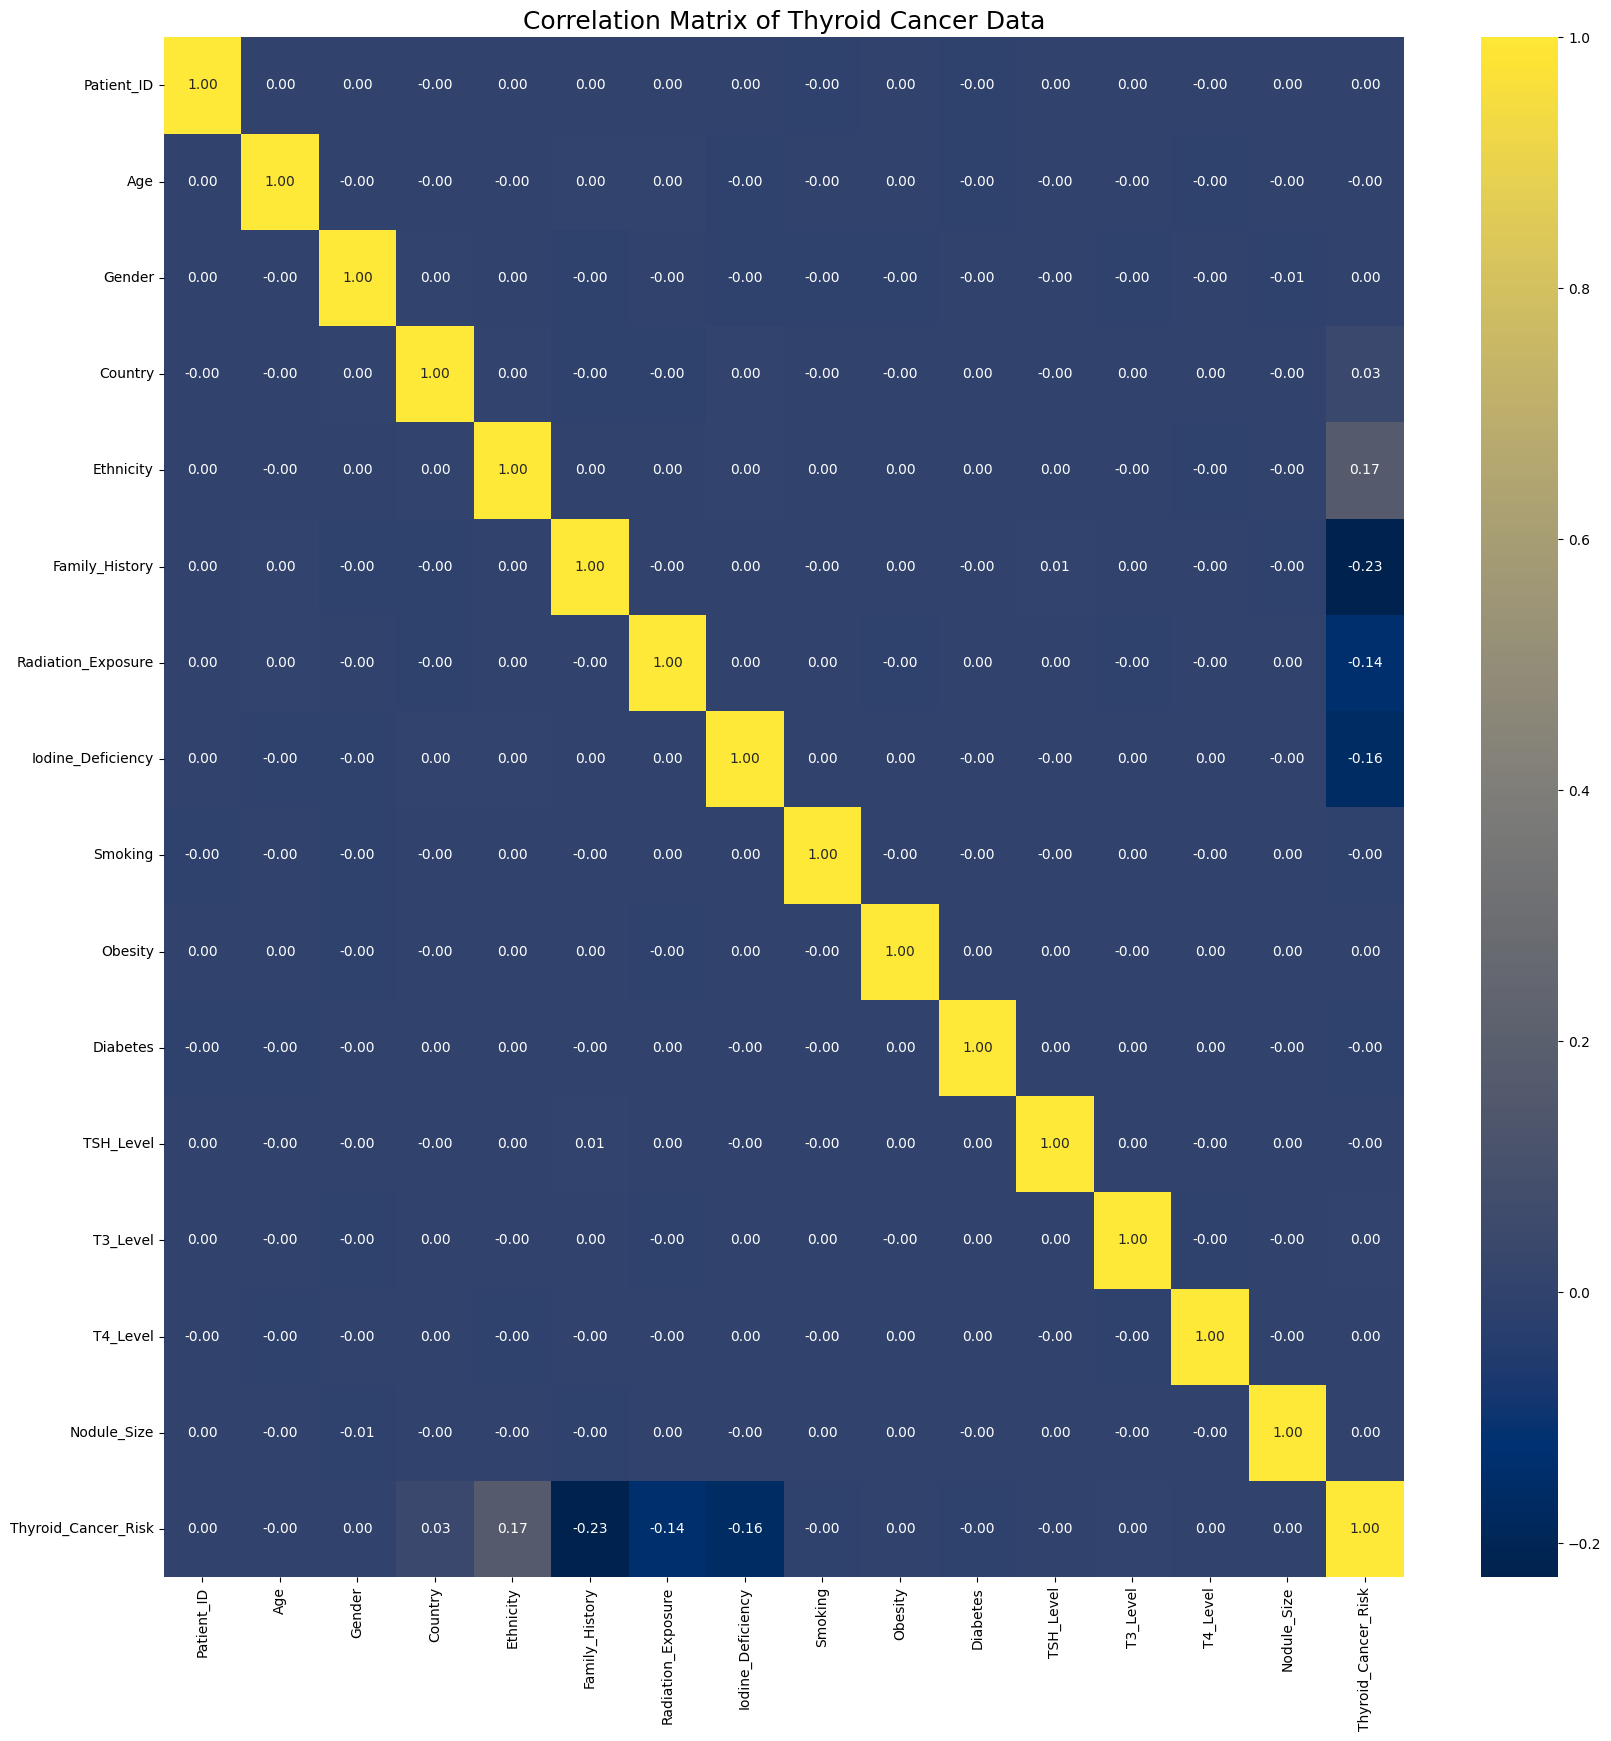

In [13]:
f, ax = plt.subplots(figsize=[20, 20])

sns.heatmap(thyroid_data.corr(), annot=True, fmt=".2f", ax=ax, cmap="cividis")

ax.set_title("Correlation Matrix of Thyroid Cancer Data", fontsize=18)

plt.show()

The provided code is used to generate a correlation matrix, which helps visualize the relationships between the different features and the target label. This matrix shows how strongly each feature is related to the label and to other features. By analyzing the correlation matrix, we can identify patterns and dependencies that are useful for building and refining our model.



***Splitting Train and Test***

In [14]:
X = thyroid_data.drop(columns=['Thyroid_Cancer_Risk'])
Y = thyroid_data['Thyroid_Cancer_Risk']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
print('X_train:',np.shape(X_train))
print('y_train:',np.shape(y_train))
print('X_test:',np.shape(X_test))
print('y_test:',np.shape(y_test))

X_train: (148883, 15)
y_train: (148883,)
X_test: (63808, 15)
y_test: (63808,)


***Training The Model Using XGBoost***

In [16]:

matrix_train = xgb.DMatrix(X_train, label=y_train)
matrix_test = xgb.DMatrix(X_test, label=y_test)

parameters = {
    'objective': 'multi:softmax',
    'num_class': 3,
    'max_depth': 6,            
    'learning_rate': 0.01,       
    'min_child_weight': 2,        
    'subsample': 0.9,            
    'colsample_bytree': 0.9,     
    'gamma': 0.05,               
    'lambda': 1.2,               
    'alpha': 0.1,                
    'random_state': 42
}

In [17]:
results_cv = xgb.cv(params=parameters,
                    dtrain=matrix_train,
                    num_boost_round=500,
                    nfold=5,
                    early_stopping_rounds=10,  
                    metrics='mlogloss',
                    as_pandas=True)

print("Cross-Validation Results:")
print(results_cv)

Cross-Validation Results:
     train-mlogloss-mean  train-mlogloss-std  test-mlogloss-mean  \
0               1.093438            0.000008            1.093465   
1               1.089120            0.000013            1.089172   
2               1.085164            0.000021            1.085246   
3               1.081337            0.000028            1.081451   
4               1.076559            0.000032            1.076695   
..                   ...                 ...                 ...   
495             0.589944            0.000142            0.599846   
496             0.589786            0.000140            0.599708   
497             0.589671            0.000142            0.599619   
498             0.589516            0.000138            0.599487   
499             0.589371            0.000140            0.599366   

     test-mlogloss-std  
0             0.000008  
1             0.000018  
2             0.000024  
3             0.000033  
4             0.000028  
..     

In [18]:

best_round = results_cv['test-mlogloss-mean'].idxmin()
print("Best round (with lowest test mlogloss):", best_round)


Best round (with lowest test mlogloss): 499


In [19]:
# Training model and predicting 
model = xgb.train(params=parameters, dtrain=matrix_train, num_boost_round=best_round)
y_pred = model.predict(matrix_test)
y_pred_risk = [int(label) for label in y_pred]

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred_risk)
print(f"Accuracy: {accuracy}")

f1 = f1_score(y_test, y_pred_risk, average='weighted')
print(f"F1 Score: {f1}")

print(classification_report(y_test, y_pred_risk))


Accuracy: 0.6593844032096289
F1 Score: 0.5323481544058698
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9599
           1       0.60      1.00      0.75     32485
           2       0.38      0.00      0.00     21724

    accuracy                           0.66     63808
   macro avg       0.66      0.67      0.58     63808
weighted avg       0.59      0.66      0.53     63808



The model performs well on the majority class but fails completely on the minority class. This is a classic sign of an imbalanced dataset, where the model prioritizes the majority class and ignores the minority class. Despite a decent accuracy of 65.9%, the model’s performance is poor for class 2, which is critical in many applications.